# Traçando gráficos com matplotlib
Use matplotlib para criar gráficos de barras que permitam visualizar as conclusões que você tirou com groupby e query.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# Importe os pacotes necessários e carregue o arquivo `winequality_edited.csv`

df = pd.read_csv('winequality_edited.csv')

df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Meduim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


### #1: Será que vinhos com maior teor alcóolico recebem avaliações melhores?
Crie um gráfico de barras com uma barra para amostras de vinho com baixo teor alcóolico e outra para amostras com alto teor alcóolico. Esse primeiro está preenchido para você.

In [50]:
# Use query para selecionar cada grupo e obter sua qualidade média
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

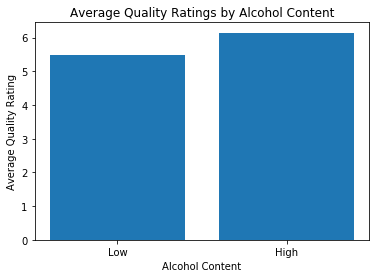

In [51]:
# Crie um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Vinhos mais suaves recebem avaliações melhores?
Crie um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [52]:
# Use query para selecionar cada grupo e obter sua qualidade média
median_sugar = df['residual_sugar'].median()

low_sugar = df.query('residual_sugar < {}'.format(median_sugar))

high_sugar = df.query('residual_sugar >= {}'.format(median_sugar))

sugar_quality_low = low_sugar['quality'].mean()

sugar_quality_high = high_sugar['quality'].mean()


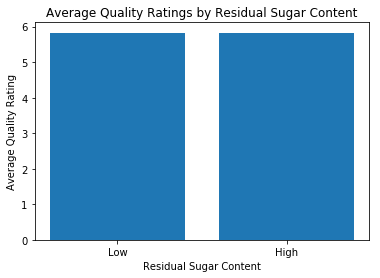

In [53]:
# Crie um gráfico de barras com rótulos adequados
locations = [1,2]

heights = [sugar_quality_low,sugar_quality_high]

labels=['Low','High']

plt.bar(locations, heights, tick_label=labels)

plt.title('Average Quality Ratings by Residual Sugar Content')

plt.xlabel('Residual Sugar Content')

plt.ylabel('Average Quality Rating');

### #3: Qual o nível de acidez que recebe a maior avaliação média?
Crie um gráfico de barras com uma barra para cada um dos quatro níveis de acidez.

In [54]:
# Use groupby para obter a qualidade média para cada nível de acidez
mean_quality_by_acidty = df.groupby('acidity_levels')['quality'].mean()
mean_quality_by_acidty.head()

acidity_levels
High               5.783343
Low                5.859593
Meduim             5.850832
Moderately High    5.784540
Name: quality, dtype: float64

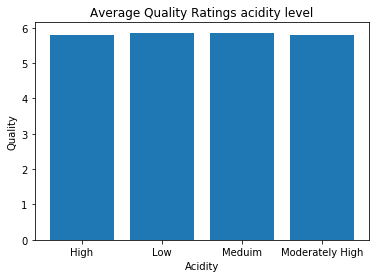

In [55]:
# Crie um gráfico de barras com rótulos adequados
locations = [1,2,3,4]
labels = ['High','Low','Meduim','Moderately High']
plt.bar(locations,mean_quality_by_acidty, tick_label=labels)
plt.title('Average Quality Ratings acidity level')
plt.xlabel('Acidity')
plt.ylabel('Quality');

### Bonus: Crie um gráfico de linha para os dados em #3
Você pode usar a função [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) do pyplot para isso.

In [56]:
mean_quality_by_acidty.sort_values(ascending=True)

acidity_levels
High               5.783343
Moderately High    5.784540
Meduim             5.850832
Low                5.859593
Name: quality, dtype: float64

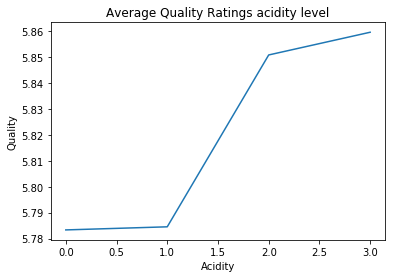

In [61]:

locations = [1,2,3,4]
labels = ['High','Low','Meduim','Moderately High']

plt.plot(mean_quality_by_acidty.sort_values(ascending=True).values)


plt.title('Average Quality Ratings acidity level')
plt.xlabel('Acidity')
plt.ylabel('Quality');

Compare isto com o gráfico de barras. Como é que a exibição desta visualização, ao invés do gráfico de barras, poderia afetar as conclusões de alguém sobre estes dados?